In [2]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()
import matplotlib.pyplot as plt

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('^NSEI', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-31 00:00:00+05:30,17519.199219,17559.800781,17435.199219,17464.750000,17464.750000,281100
1,2022-04-01 00:00:00+05:30,17436.900391,17703.699219,17422.699219,17670.449219,17670.449219,291800
2,2022-04-04 00:00:00+05:30,17809.099609,18114.650391,17791.400391,18053.400391,18053.400391,345500
3,2022-04-05 00:00:00+05:30,18080.599609,18095.449219,17921.550781,17957.400391,17957.400391,283500
4,2022-04-06 00:00:00+05:30,17842.750000,17901.000000,17779.849609,17807.650391,17807.650391,328800
...,...,...,...,...,...,...,...
244,2023-03-23 00:00:00+05:30,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200
245,2023-03-24 00:00:00+05:30,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000
246,2023-03-27 00:00:00+05:30,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400
247,2023-03-28 00:00:00+05:30,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800


<Figure size 432x288 with 0 Axes>

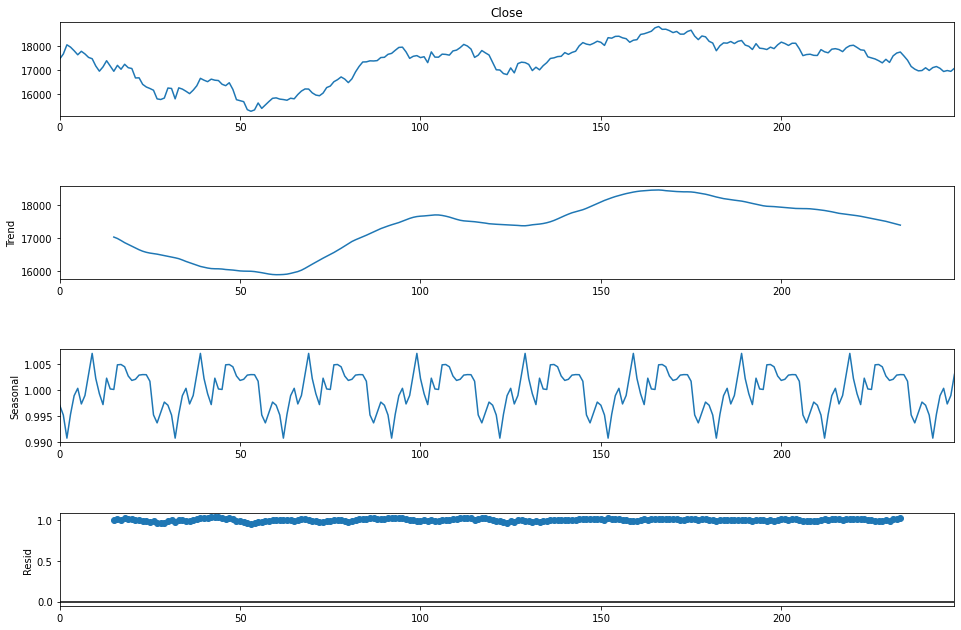

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

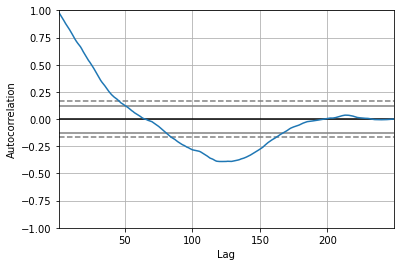

In [5]:
pd.plotting.autocorrelation_plot(data["Close"])

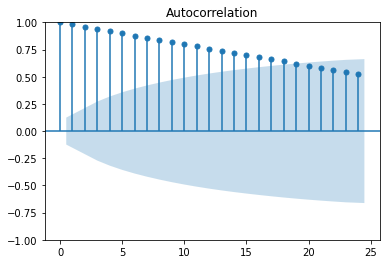

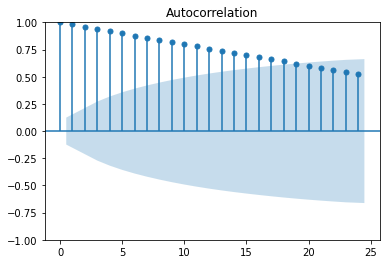

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Close'])

C:\Users\Acer Assfire 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


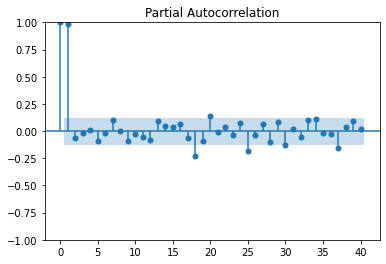

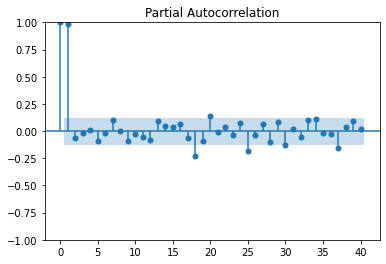

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 40)

In [22]:
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 18, 1, 19
model = ARIMA(data["Close"], order=(p, d, q))
model = model.fit()  
print(model.summary())

C:\Users\Acer Assfire 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Acer Assfire 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  249
Model:               ARIMA(18, 1, 19)   Log Likelihood               -1588.229
Date:                Fri, 31 Mar 2023   AIC                           3252.457
Time:                        00:14:33   BIC                           3385.967
Sample:                             0   HQIC                          3306.203
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3250      0.257      1.266      0.206      -0.178       0.828
ar.L2          0.2400      0.241      0.995      0.320      -0.233       0.713
ar.L3         -0.0692      0.178     -0.389      0.6

C:\Users\Acer Assfire 7\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

249    17194.977293
250    17253.858813
251    17214.154800
252    17091.135079
253    17067.528130
254    17041.423822
255    17123.990624
256    17155.419978
257    17212.634249
258    17130.543820
259    17191.473519
Name: predicted_mean, dtype: float64


<AxesSubplot:>

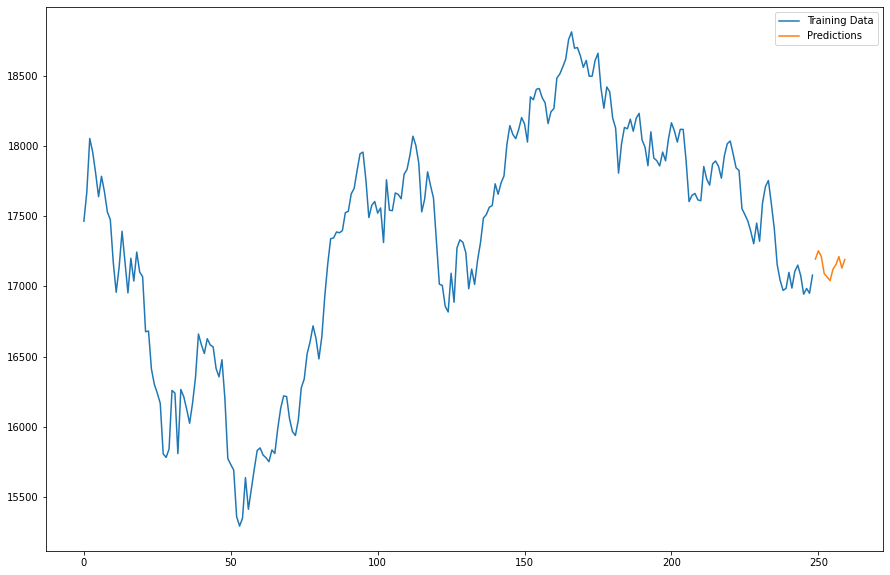

In [24]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")